# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymysql
from dotenv import load_dotenv 
import os
from sqlalchemy import create_engine



In [2]:
#hacemos la solicitud http
url = 'https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify'
response = requests.get(url)

In [3]:
#verificar que el código es correcto 
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify')

print(f'Total tables: {len(tables)}')

Total tables: 27


In [4]:
df = tables[0]
df

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""Blinding Lights""",The Weeknd,4.836,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.357,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.901,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.889,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.873,1 April 2022,[6]
...,...,...,...,...,...,...
96,97,"""Stay with Me""",Sam Smith,2.292,14 April 2014,[98]
97,98,"""Someone Like You""",Adele,2.290,24 January 2011,[99]
98,99,"""Havana""",Camila Cabello and Young Thug,2.281,3 August 2017,[100]
99,100,"""Memories""",Maroon 5,2.260,20 September 2019,[101]


In [5]:
#PASO 4

df.dropna(inplace=True)
for col in df.columns:
    df[col] = df[col].astype(str).str.replace('$','').str.replace('B', '')
df

,Rank,Song,Artist(s),Streams (billions),Release date,Ref.
0,1,"""linding Lights""",The Weeknd,4.836,29 November 2019,[2]
1,2,"""Shape of You""",Ed Sheeran,4.357,6 January 2017,[3]
2,3,"""Someone You Loved""",Lewis Capaldi,3.901,8 November 2018,[4]
3,4,"""Starboy""",The Weeknd and Daft Punk,3.889,21 September 2016,[5]
4,5,"""As It Was""",Harry Styles,3.873,1 April 2022,[6]
...,...,...,...,...,...,...
96,97,"""Stay with Me""",Sam Smith,2.292,14 April 2014,[98]
97,98,"""Someone Like You""",Adele,2.290,24 January 2011,[99]
98,99,"""Havana""",Camila Cabello and Young Thug,2.281,3 August 2017,[100]
99,100,"""Memories""",Maroon 5,2.260,20 September 2019,[101]


PASO 5

In [6]:
conexion=sqlite3.connect('top_songs.db') 
try: 
    conexion.execute("""CREATE TABLE IF NOT EXISTS most_streamed_songs(
                    rank INTEGER PRIMARY KEY AUTOINCREMENT, 
                    song VARCHAR(255) NOT NULL, 
                    artist VARCHAR(255) NOT NULL,
                    streams_billions INT NOT NULL,
                    release_date DATETIME NOT NULL, 
                    ref INT
                    )""")
    print("Se ha creado la tabla most_streamed_songs")
except sqlite3.OperationalError:
    print("la tabla most_streamed_songs ya existe")
conexion.close

Se ha creado la tabla most_streamed_songs


<function Connection.close()>

In [7]:
conexion=sqlite3.connect("top_songs.db")
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("Hablando en plata", "Melendi", 20354845, "2003-05-03", 2))
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("Quédate", "Quevedo", 369258147, "2022-11-11", 3))
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("Rosas", "La Oreja de Van Gogh", 2365478, "2003-09-26", 4))
conexion.commit()
conexion.close()

PASO 6

In [8]:
conexion=sqlite3.connect("top_songs.db")
cursor=conexion.execute("select rank, song,artist,streams_billions,release_date,ref from most_streamed_songs")
for fila in cursor:
    print(fila)
conexion.close()

(1, 'Hablando en plata', 'Melendi', 20354845, '2003-05-03', 2)
(2, 'Quédate', 'Quevedo', 369258147, '2022-11-11', 3)
(3, 'Rosas', 'La Oreja de Van Gogh', 2365478, '2003-09-26', 4)
(4, 'Hablando en plata', 'Melendi', 20354845, '2003-05-03', 2)
(5, 'Quédate', 'Quevedo', 369258147, '2022-11-11', 3)
(6, 'Rosas', 'La Oreja de Van Gogh', 2365478, '2003-09-26', 4)


In [9]:
conexion=sqlite3.connect("top_songs.db")
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("Caminando por la vida", "Melendi", 18520369, "2005-01-23", 5))
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("Vista al mar", "Quevedo", 257169987, "2023-09-09", 6))
conexion.execute("insert into most_streamed_songs(song, artist, streams_billions, release_date, ref) values (?, ?, ?, ?, ?)", ("La Playa", "La Oreja de Van Gogh", 5365210, "2000-08-28", 7))
conexion.commit()
conexion.close()

In [10]:
conexion=sqlite3.connect("top_songs.db")
cursor=conexion.execute("select rank, song,artist,streams_billions,release_date,ref from most_streamed_songs")
for fila in cursor:
    print(fila)
conexion.close()

(1, 'Hablando en plata', 'Melendi', 20354845, '2003-05-03', 2)
(2, 'Quédate', 'Quevedo', 369258147, '2022-11-11', 3)
(3, 'Rosas', 'La Oreja de Van Gogh', 2365478, '2003-09-26', 4)
(4, 'Hablando en plata', 'Melendi', 20354845, '2003-05-03', 2)
(5, 'Quédate', 'Quevedo', 369258147, '2022-11-11', 3)
(6, 'Rosas', 'La Oreja de Van Gogh', 2365478, '2003-09-26', 4)
(7, 'Caminando por la vida', 'Melendi', 18520369, '2005-01-23', 5)
(8, 'Vista al mar', 'Quevedo', 257169987, '2023-09-09', 6)
(9, 'La Playa', 'La Oreja de Van Gogh', 5365210, '2000-08-28', 7)


In [ ]:
conexion=sqlite3.connect("top_songs.db")
eliminiar_filas = [4, 5, 6]
conexion.executemany("DELETE FROM most_streamed_songs WHERE rank = 4,5,6",[(rank,) for rank in eliminiar_filas])
conexion.commit()
cursor = conexion.execute("SELECT * FROM most_streamed_songs")
for fila in cursor:
    print(fila)

conexion.close()

(1, 'Hablando en plata', 'Melendi', 20354845, '2003-05-03', 2)
(2, 'Quédate', 'Quevedo', 369258147, '2022-11-11', 3)
(3, 'Rosas', 'La Oreja de Van Gogh', 2365478, '2003-09-26', 4)
(7, 'Caminando por la vida', 'Melendi', 18520369, '2005-01-23', 5)
(8, 'Vista al mar', 'Quevedo', 257169987, '2023-09-09', 6)
(9, 'La Playa', 'La Oreja de Van Gogh', 5365210, '2000-08-28', 7)


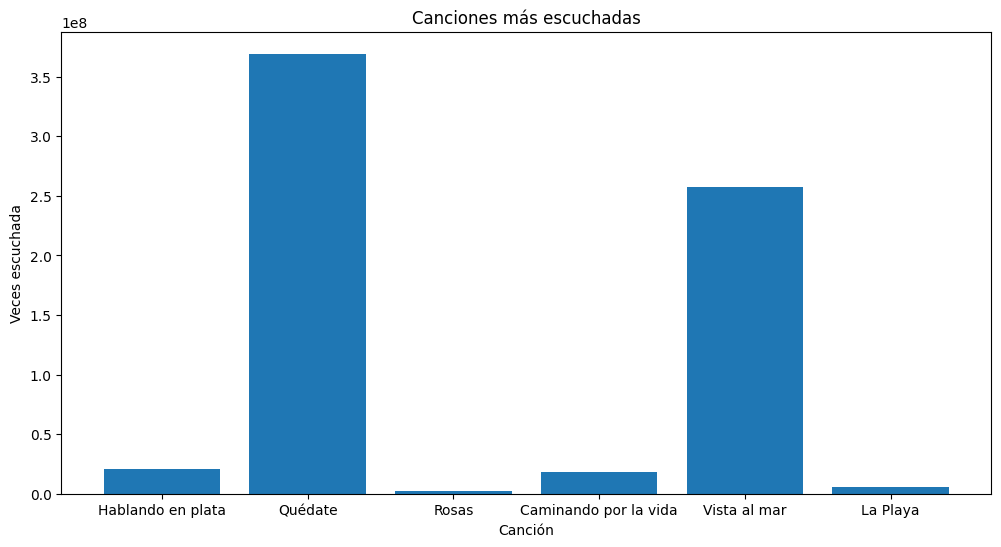

In [17]:
conexion = sqlite3.connect("top_songs.db")
df1 = pd.read_sql_query("SELECT song, artist, streams_billions, release_date FROM most_streamed_songs", conexion)
conexion.close()
plt.figure(figsize=(12,6))
plt.bar(df1["song"], df1["streams_billions"])
plt.title("Canciones más escuchadas")
plt.xlabel("Canción")
plt.ylabel("Veces escuchada")
plt.show()

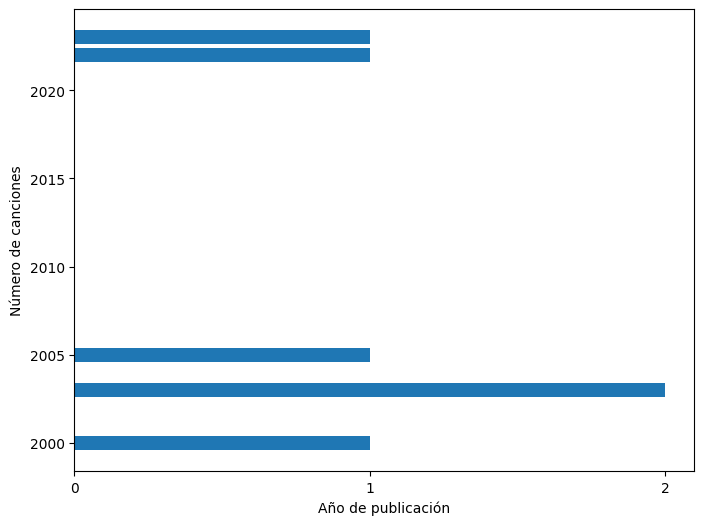

In [26]:
df1["release_year"] = pd.to_datetime(df1["release_date"]).dt.year
fechas = df1["release_year"].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.barh(fechas.index, fechas.values)
plt.xlabel("Año de publicación")
plt.ylabel("Número de canciones")
plt.xticks(range(0, fechas.values.max() + 1))
plt.show()

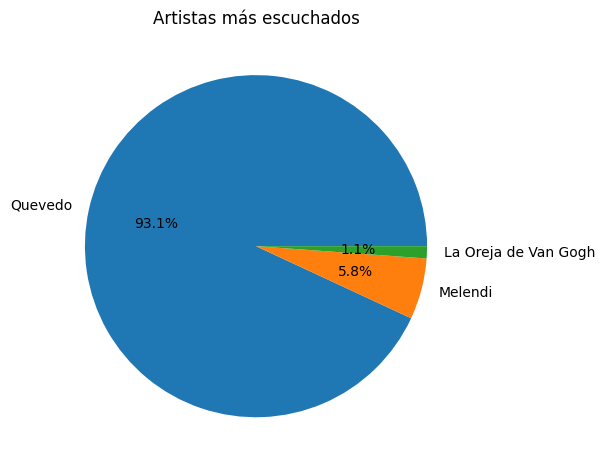

In [25]:
artistas = df1.groupby("artist")["streams_billions"].sum().sort_values(ascending=False)
plt.pie(artistas, labels=artistas.index, autopct="%1.1f%%")
plt.title("Artistas más escuchados")
plt.tight_layout()
plt.show()